# US Accidents Exploratory Data Analysis

According to the [Association for Safe International Road Travel (ASIRT)](https://www.asirt.org/safe-travel/road-safety-facts/#:~:text=More%20than%2038%2C000%20people%20die,for%20people%20aged%201%2D54.), around 38,000 people die every year in crashes on U.S. roadways. In this notebook, we will focus on some facts about our data and explore some relative information from the given statistics. The accident data is collected between the time frame of February 2016 to December 2020 and consists the record of around 3 million accidents recorded across the country.

Here are some of the Python libraries used in this project:

>- Pandas: You can explore more about this library [here](https://pandas.pydata.org/)
>- Seaborn: You can explore more about this library [here](https://seaborn.pydata.org/)
>- Matplotlib: You can explore more about this library [here](https://matplotlib.org/)
>- NumPy: You can explore more about this library [here](https://numpy.org/)

## Downloading the Dataset

We will download our dataset from Kaggle, where we can find a lot of interesting datasets online. There are several options for getting the dataset into Jupyter:

>- Download the CSV manually and upload it via Jupyter's GUI
>- Use the urlretrieve function from the urllib.request to download CSV files from a raw URL
>- Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for
direct download.

We'll use the opendatasets helper library to download the files.

In [1]:
!pip install opendatasets --upgrade --quiet

You are using pip version 19.0.3, however version 21.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

In [4]:
import opendatasets as od
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hemanyaarora
Your Kaggle Key: ········
us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)


In [1]:
data_dir = './us-accidents'

In [2]:
import os
os.listdir(data_dir)

['us-accidents.zip', 'US_Accidents_Dec20_Updated.csv']

In [3]:
project_name = 'us-accidents-eda'

## Data Preparation and Cleaning

In order to work with our data with more ease, we have to leave no room of error and misinformation in our data files. For that we will import certain Python libraries necessary and optimal for working with our data.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let's import our dataset into a Pandas dataframe

In [5]:
us_accident_df = pd.read_csv('./us-accidents/US_Accidents_Dec20_Updated.csv')
us_accident_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,...,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


In [6]:
us_accident_df.shape

(2906610, 47)

Here we see that our dataset has 2906610 rows describing information about car accidents across the United States, each having a unique ID whereas the 47 columns provide us with relative information about the accidents.

Let's look at the number of columns in our dataset.

In [7]:
us_accident_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
us_accident_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [9]:
us_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Now we will see the amount of null values in our dataset in order to work with the data with more ease.

In [125]:
us_accident_df.isna().sum()/len(us_accident_df)*100

ID                   0.000000
Severity             0.000000
Start_Time           0.000000
End_Time             0.000000
Distance(mi)         0.000000
Description          0.000000
Street               0.000000
Side                 0.000000
City                 0.003716
County               0.000000
State                0.000000
Zipcode              0.038326
Timezone             0.118007
Airport_Code         0.227344
Weather_Timestamp    1.614148
Temperature(F)       0.000000
Humidity(%)          0.000000
Pressure(in)         1.957882
Visibility(mi)       2.479796
Weather_Condition    2.471986
Amenity              0.000000
Bump                 0.000000
Crossing             0.000000
Give_Way             0.000000
Junction             0.000000
No_Exit              0.000000
Railway              0.000000
Roundabout           0.000000
Station              0.000000
Stop                 0.000000
Traffic_Calming      0.000000
Traffic_Signal       0.000000
Turning_Loop         0.000000
Sunrise_Su

As we can see that the highest percentage of values missing in our dataset are from the columns 'Number', 'Precipitation(in)', and 'Wind_Chill(F)'. Hence, we wil delete these columns so that we can work with a much cleaner dataset and analyze our data with more ease.

In [11]:
us_accident_df = us_accident_df.drop(['Number', 'Precipitation(in)', 'Wind_Chill(F)'], axis = 1)

There are also certain columns which are unecessary and it is better that we drop these columns in order to work more smoothly. For instance, we don't need the column 'Country' as it is clear from the dataset that we are working explicitely with The United States's dataset.

In [12]:
us_accident_df = us_accident_df.drop(['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Country', 'Wind_Direction', 'Wind_Speed(mph)', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis = 1)

Now, let's work on filling the missing values in the remaining columns.

In [13]:
us_accident_df['Temperature(F)'] = us_accident_df['Temperature(F)'].fillna(us_accident_df['Temperature(F)'].median())
us_accident_df['Humidity(%)'] = us_accident_df['Humidity(%)'].fillna(us_accident_df['Humidity(%)'].median())

In [14]:
us_accident_df['Pressure(in)'] = us_accident_df['Pressure(in)'].fillna(us_accident_df['Pressure(in)'].mode())
us_accident_df['Weather_Condition'] = us_accident_df['Weather_Condition'].fillna(us_accident_df['Weather_Condition'].mode())
us_accident_df['Sunrise_Sunset'] = us_accident_df['Sunrise_Sunset'].fillna(us_accident_df['Sunrise_Sunset'].mode())

Let's look at some more statistics about our data.

In [15]:
cities_df = us_accident_df.City.unique()
cities_df

array(['Greenville', 'Charlotte', 'Los Gatos', ..., 'Allons', 'Adolphus',
       'Gowanda'], dtype=object)

In [16]:
np.count_nonzero(cities_df)

11790

Here we see that our data covers accidents in around 11790 cities across the country which is actually less than the total number of cities in The United States. We can confirm this fact by heading over to this [website](https://worldpopulationreview.com/us-city-rankings/how-many-cities-are-in-the-us).

As we can see that our data file is really big in size, let's optimize it by converting some of the columns containing 'String' type objects to categorical data types.

In [17]:
random_df = us_accident_df.head(5).transpose
random_df

<bound method DataFrame.transpose of     ID  Severity           Start_Time             End_Time  Distance(mi)  \
0  A-1         2  2019-05-21 08:29:55  2019-05-21 09:29:40           0.0   
1  A-2         2  2019-10-07 17:43:09  2019-10-07 19:42:50           0.0   
2  A-3         2  2020-12-13 21:53:00  2020-12-13 22:44:00           1.4   
3  A-4         2  2018-04-17 16:51:23  2018-04-17 17:50:46           0.0   
4  A-5         3  2016-08-31 17:40:49  2016-08-31 18:10:49           0.0   

                                         Description                Street  \
0            Accident on Tanner Rd at Pennbrooke Ln.             Tanner Rd   
1  Accident on Houston Branch Rd at Providence Br...  Providence Branch Ln   
2  Stationary traffic on CA-17 from Summit Rd (CA...        Santa Cruz Hwy   
3         Accident on US-395 Southbound at Topsy Ln.      US Highway 395 S   
4  Accident on I-595 Westbound at Exit 4 / Pine I...               I-595 W   

  Side             City       County 

From the the data above, we can see that columns *Side* and *Sunrise_Sunset* can be converted into categorical data types. Apart from this, we can see that the columns *Start_Time* and *End_Time* can be converted into the pandas DateTime data type as well.

In [18]:
us_accident_df['Side'] = us_accident_df.Side.astype("category")
us_accident_df['Sunrise_Sunset'] = us_accident_df.Sunrise_Sunset.astype("category")
us_accident_df['Start_Time'] = pd.to_datetime(us_accident_df.Start_Time)
us_accident_df['End_Time'] = pd.to_datetime(us_accident_df.End_Time)

In [19]:
us_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 34 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   End_Time           datetime64[ns]
 4   Distance(mi)       float64       
 5   Description        object        
 6   Street             object        
 7   Side               category      
 8   City               object        
 9   County             object        
 10  State              object        
 11  Zipcode            object        
 12  Timezone           object        
 13  Airport_Code       object        
 14  Weather_Timestamp  object        
 15  Temperature(F)     float64       
 16  Humidity(%)        float64       
 17  Pressure(in)       float64       
 18  Visibility(mi)     float64       
 19  Weather_Condition  object        
 20  Amenity            bool 

Here, we can see that we reduced the size of our dataset from 790+ MB to 440.7+ MB.

As now our data is clean, we are ready to move forward and analyze our data and find some interesting insights.

## Exploratory Analysis and Visualization

To understand the demographics of the accidents across the country, we have to undertake the responsibility to build relationships between different components of our dataset so as we can understand the importance of exploring and answering new questions relative to our data. For instance, answering questions regarding the cities with the highest rate of accidents or the percentage of accidents happening in day and night, using visualization graphs will be beneficial to build a robust way to communicate the exploratory analysis of our data with much ease. 

Let's begin by importing matplotlib and seaborn libraries.

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**States with the highest number of accidents in The United States**

Let's move on and discover which cities have the highest number of accidents across the country.

In [21]:
states_df = us_accident_df['State'].value_counts(ascending = False)
states_df

CA    730744
FL    263300
TX    226640
NY    126176
NC    122797
SC    120462
OR     98352
PA     89745
VA     89730
MN     79712
IL     77626
GA     69536
MI     67073
AZ     61707
TN     55495
MD     52755
NJ     50214
LA     50103
WA     49455
OH     47836
UT     46897
CO     37280
OK     35105
AL     33290
MO     28674
MA     25121
IN     24993
CT     24054
KY     15296
WI     14669
NE     13678
IA      9492
RI      8314
NV      7812
KS      7444
NH      6250
MS      5419
DC      5201
AR      4726
DE      4625
ID      4165
NM      3973
WV      3421
MT      3333
ME      2266
VT       555
ND       463
WY       419
SD       217
Name: State, dtype: int64

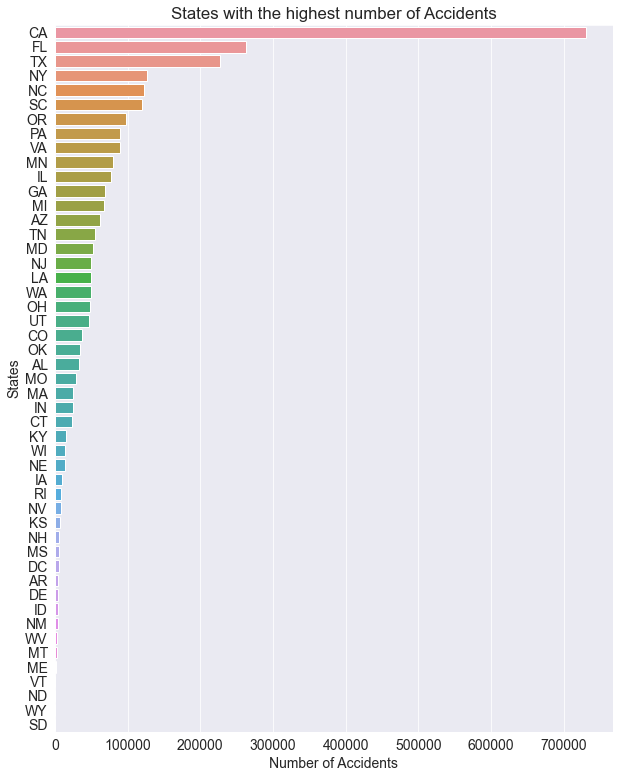

In [22]:
plt.figure(figsize = (10,13))
plt.title("States with the highest number of Accidents")
ax = sns.barplot(x = states_df, y = states_df.index, errwidth = 5);
ax.set(xlabel = 'Number of Accidents', ylabel = 'States');

From the graph above, we can infer that California stands as the state with the highest number of accidents across the country, standing at 730744 accidents which happened during the time frame of February 2016 to December 2020. This is followed by states Florida and Texas standing at 263300 and 226640 accidents respectively.

Let's move on and discover some more statisctics about our data.

**Cities with the highest number of accidents recorded in the United States**

In [23]:
cities_df = us_accident_df['City'].value_counts(ascending = False).head(20)
cities_df

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

Here we see that Los Angeles lands as the city with the highest recorded accidents across the United States in between the mentioned time frame, followed by Houston and Charlotte respectively.

Let's display this data as a graph.

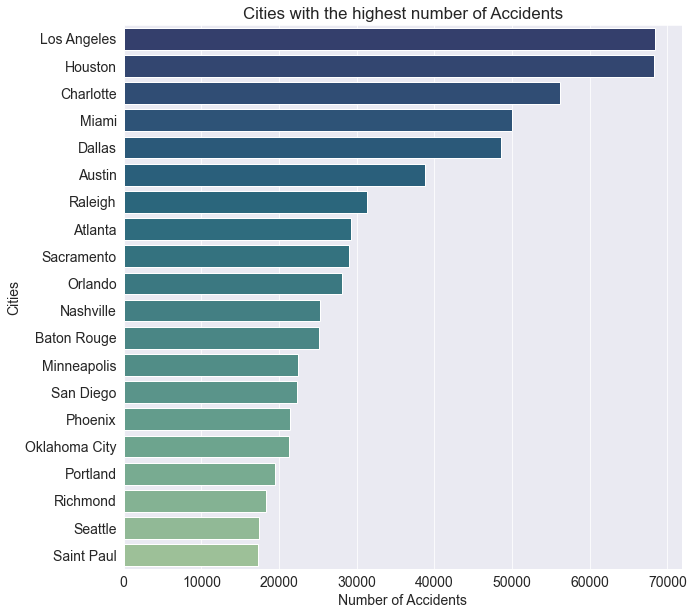

In [24]:
plt.figure(figsize = (10,10))
plt.title("Cities with the highest number of Accidents")
ax = sns.barplot(x = cities_df, y = cities_df.index, errwidth = 5, palette = 'crest_r');
ax.set(xlabel = 'Number of Accidents', ylabel = 'Cities');

**Percentage comparison of accidents in Day and Night**

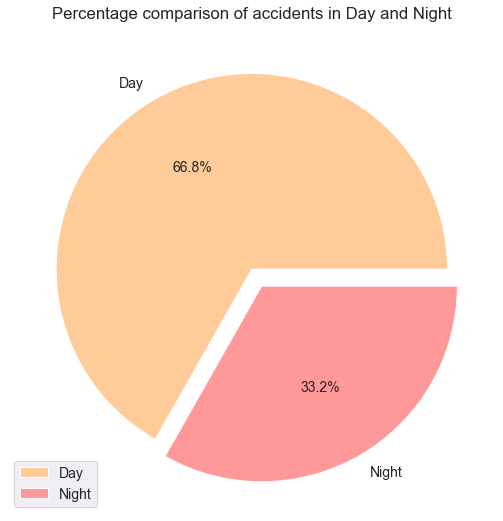

In [25]:
plt.figure(figsize = (9, 9))
us_accident_df.Sunrise_Sunset.value_counts().plot(kind = "pie", autopct = '%1.1f%%', explode = (0, 0.1), colors = ['#ffcc99', '#ff9999']);
plt.ylabel("")
plt.title("Percentage comparison of accidents in Day and Night");
plt.legend();

From the pie chart above, we can infer that 66.8% of accidents happened during the day and 33.2% happened during the night during the period of February 2016 to December 2020.

**Accidents due to surrounding factors**

In [26]:
cause_df = us_accident_df[['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]
cause_df

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,False,False,False,False,False,False,False,False,True,False,False,False
2906606,False,False,False,False,False,False,False,False,False,False,False,False
2906607,False,False,False,False,False,False,False,False,False,False,False,False
2906608,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df = cause_df.sum().sort_values(ascending = False)
df

Traffic_Signal     453665
Junction           276077
Crossing           218929
Station             57910
Stop                45454
Railway             25927
Give_Way             8220
No_Exit              3858
Traffic_Calming      1307
Bump                  579
Roundabout            142
Turning_Loop            0
dtype: int64

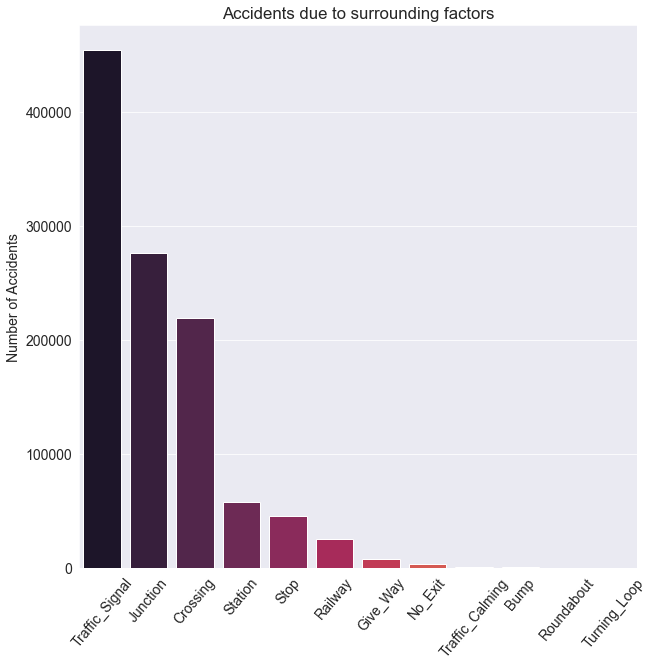

In [28]:
plt.figure(figsize=(10, 10))
grp = sns.barplot(x = df.index, y = df.values, palette = 'rocket')
plt.title("Accidents due to surrounding factors")
plt.xticks(rotation = 50);
grp.set(ylabel = "Number of Accidents")
plt.show()

From the insights above, we can definitively state that out of all the given surroundings, most of the accidents happened around the Traffic signals, where the exact number is 453665 followed by Junctions and Crossing standing at 276077 and 218929 accidents respectively.

**Accidents due to Weather Condition**

In [29]:
weather_df = us_accident_df.Weather_Condition.value_counts().sort_values(ascending=False).head(20)
weather_df

Fair                     692680
Clear                    498925
Mostly Cloudy            386122
Partly Cloudy            268851
Cloudy                   245054
Overcast                 237068
Light Rain               140946
Scattered Clouds         127090
Light Snow                39941
Fog                       33424
Rain                      33383
Haze                      32993
Heavy Rain                12340
Light Drizzle              9484
Fair / Windy               9121
Smoke                      6037
Mostly Cloudy / Windy      5100
Cloudy / Windy             4773
Snow                       4589
T-Storm                    3313
Name: Weather_Condition, dtype: int64

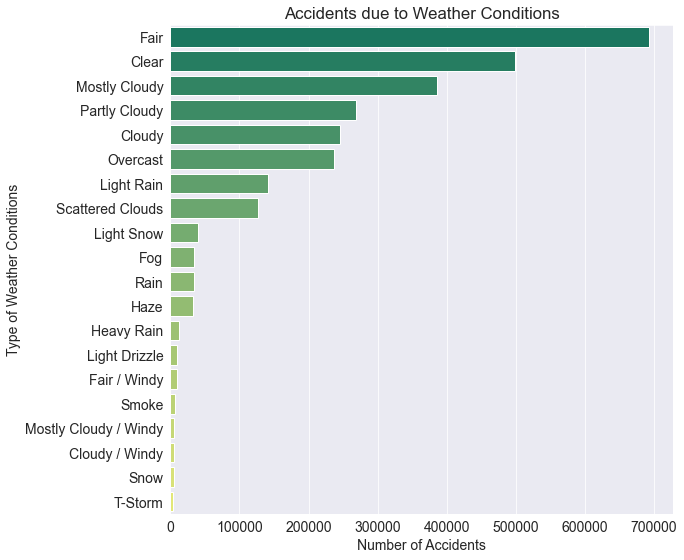

In [30]:
plt.figure(figsize=(9, 9))
bar = sns.barplot(x = weather_df.values, y = weather_df.index, palette = 'summer');
bar.set(xlabel = 'Number of Accidents', ylabel = 'Type of Weather Conditions');
plt.title('Accidents due to Weather Conditions');
plt.show()

From the data above, we can infer that out of all the weather conditions, the biggest cause of accidents is due to the Fair weather, followed by Clear and Mostly Cloudy.

**Accidents demographics relative to visibility**

In [31]:
visibility_df = us_accident_df['Visibility(mi)'].value_counts().sort_values(ascending = False).head(20)
visibility_df

10.00    2260327
7.00       87566
9.00       75270
8.00       60090
5.00       56646
6.00       51126
4.00       45793
3.00       44457
2.00       40205
1.00       29211
0.50       12369
2.50       11562
0.20        7635
0.25        7394
1.50        6960
0.80        5271
1.80        5231
0.75        4882
1.20        4083
13.00       3168
Name: Visibility(mi), dtype: int64

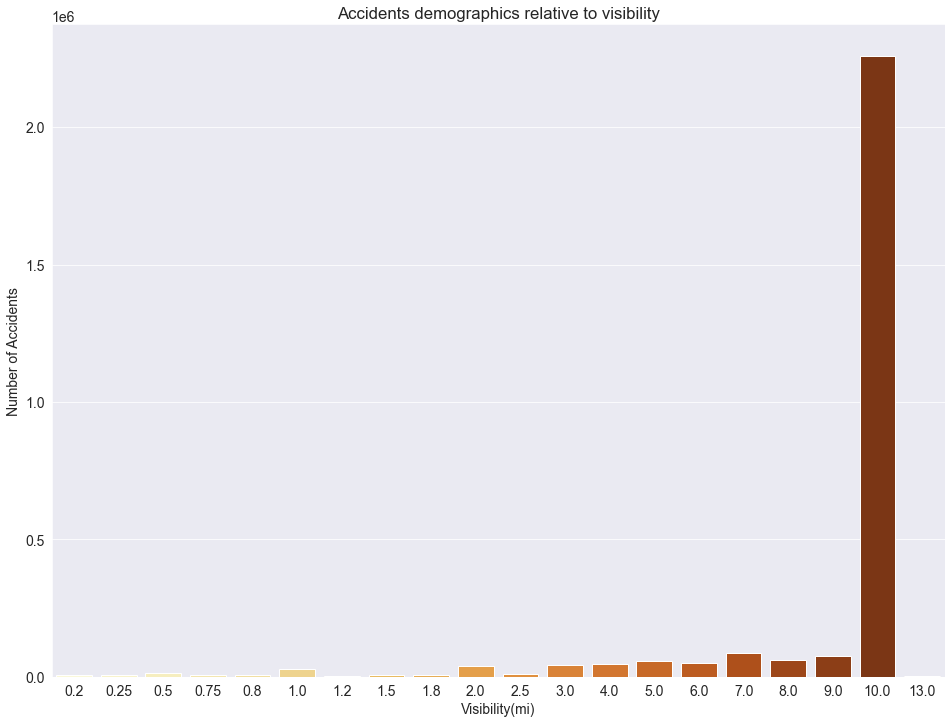

In [32]:
plt.figure(figsize=(16, 12))
graph = sns.barplot(x = visibility_df.index, y = visibility_df.values, palette = 'YlOrBr')
plt.title("Accidents demographics relative to visibility")
graph.set(xlabel = 'Visibility(mi)', ylabel = "Number of Accidents")
plt.show()

From the graph above, we can see that maximum accidents happened when the visibility was 10 miles, followed by 7 miles and 9 miles respectively.

**Accidents relative to the Distance Range**

In [33]:
distance_df = pd.cut(us_accident_df['Distance(mi)'], [0, 1, 2, 3, 4, 400], labels = ['0-1', '1-2', '2-3', '3-4', '4+'])
distance_df = distance_df.value_counts()
distance_df

0-1    1066531
1-2     142737
2-3      54228
4+       49777
3-4      26085
Name: Distance(mi), dtype: int64

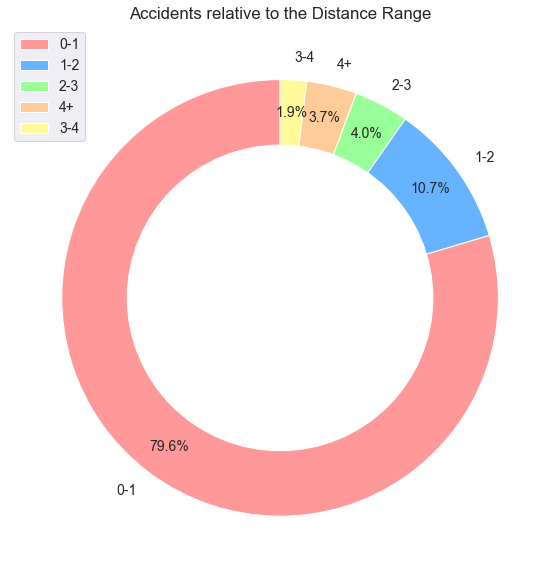

In [34]:
plt.figure(figsize = (8,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#FFF999']
pie = plt.pie(distance_df, colors = colors, labels = distance_df.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ct_cir = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(ct_cir) 
plt.tight_layout()
plt.legend(distance_df.index)
plt.title('Accidents relative to the Distance Range');

From the graph above, we can infer that 79.6% of the accidents happened in between a distance of 0-1 miles from the spot, followed by the distance range of 1-2 miles and 2-3 miles respectively.

Let's move forward and discover some other findings about our data with respect to the **Start_Time** of the accients.

**Accidents frequency throughout the day**

Let's look at what the accidents look across a day with respect to the hours in a day.

In [77]:
time_df = pd.cut(us_accident_df.Start_Time.dt.hour, [0, 6, 12, 18, 24], labels = ['12AM - 6AM', '6AM - 12PM', '12PM - 6PM', '6PM-12AM'])
time_df = time_df.value_counts()

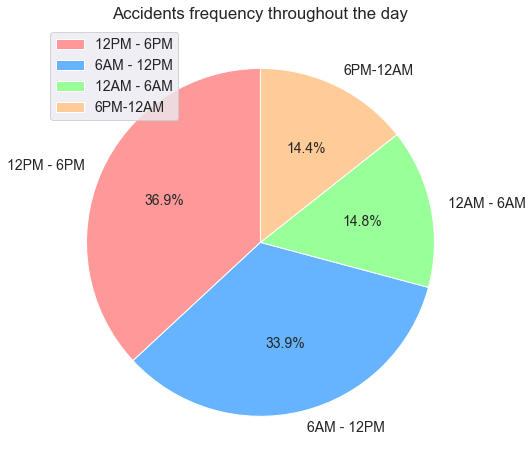

In [85]:
plt.figure(figsize = (8, 8))
color_palette = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(time_df, colors = color_palette, labels = time_df.index, autopct = '%1.1f%%', startangle=90);
plt.legend(loc = "upper left");
plt.title('Accidents frequency throughout the day');
plt.show()

From the graph above, we can say that 36.9% of accidents happened between the time frame of 12PM - 6PM, followed by 33.9% between 6AM - 12PM, 14.8% between 12AM - 6Am and 14.4% between 6PM-12AM.

**Accidents frequency relative to monthly statistics**

In [111]:
month_df = us_accident_df.Start_Time.dt.month_name()
month_df = month_df.value_counts()
month_df

December     403095
November     360169
October      326430
September    255159
June         214558
April        205487
May          204889
January      198485
March        197969
August       196597
February     186660
July         157112
Name: Start_Time, dtype: int64

From the information above, we can say that the month of December witnessed the highest number of accidents, i.e. 403095, followed by November and October respectively.

Let's plot this information on a barplot.

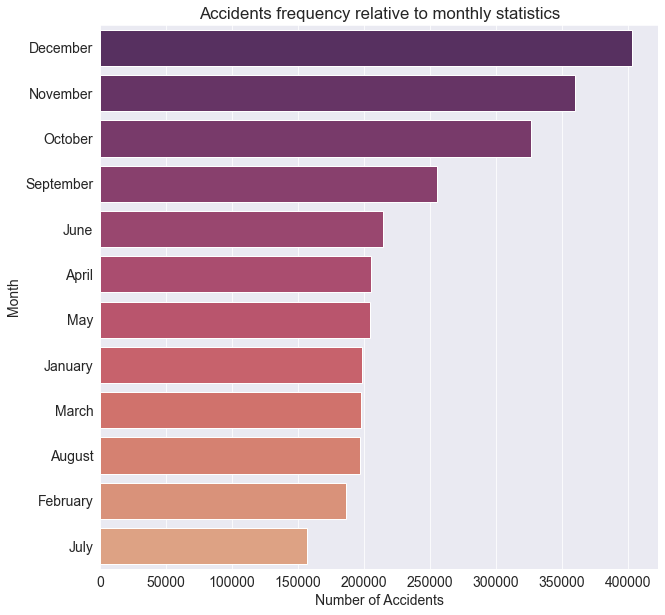

In [115]:
plt.figure(figsize = (10, 10))
ax = sns.barplot(x = month_df.values, y = month_df.index, palette = 'flare_r')
plt.title("Accidents frequency relative to monthly statistics")
ax.set(xlabel = 'Number of Accidents', ylabel = "Month")
plt.show()

**Accidents relative to Yearly statistics**

Let's look at some accidents with respect to the yearly statistics of our data.

In [118]:
year_df = us_accident_df.Start_Time.dt.year
year_df = year_df.value_counts()
year_df

2020    1033828
2019     617712
2018     535921
2017     448268
2016     270881
Name: Start_Time, dtype: int64

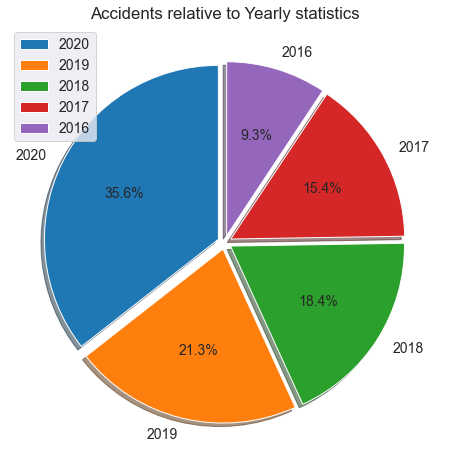

In [124]:
plt.figure(figsize = (8, 8))
explode = [0.04, 0.04, 0.04, 0.04, 0.04]
plt.pie(year_df, labels = year_df.index, explode = explode, shadow = True, autopct = '%1.1f%%', startangle=90);
plt.legend(loc = "upper left");
plt.title('Accidents relative to Yearly statistics');
plt.show()

From the graph above, we can state that the year 2020 holds 35.6% of the total number of accidents which happened between February 2016 to December 2020, followed by 2019 at 21.3% and 2018 at 18.4% respectively.

## Inferences and Conclusion

In conclusion, we can say that though accidents are sometimes uncertain and unfortunate, they are certainly not inevitable. We can do our very best in being law abiding citizens by following the rules in order to make sure our roads safer not only for ourselves, but for the future generations as well. As it is rightly said by F.S. Hughes that *Safety brings first aid to the uninjured.*